---

# <center> ------> **_Python_ Concepts from Socratica Part 2** <---<br>
# <center>**_Part 2_**

---

`[Updated on 29th Dec]`

## _URL Library !_

* "There are more pages on the web than people on Earth."
* " Many people access webpages using a browser,  but we as programmers have other methods !"
* Python 3 comes eqipped with with a package that simplifies the task of building,  loading and parsing URLs.
* The URL LIB package, contains 5 modules: 
1. request : used to open URLs.
2. response : used internally by the request module.
3. error : request exceptions, it contains several error classes for use by the request module
4. parse : it has variety of useful URL functions for breaking up the URL into meaningful pieces, like the scheme, host, port,a nd query string data.
5. robotparser : it used to inspect "robot.txt" file for what permissions are granted to bots and crawlers




* URL stands for Universal Resource Locator, and this string can holda a lot of information.
* The format of an url is:
> \<protocol> : // \<host_name> / \<path> ? \<query_string> # \<fragment>
* eg : https://en.wikipedia.org/wiki/?URLkey=value&life=43#History

* protocol : 
http, https, ftp, ... etc. The begining is called the protocol, sometimes is it's also called as scheme.
* host_name :
It ends in .com , .in, .org, .. etc. or sometimes we'll see a colon with a number which corresponds to port number.
If the port is not explicitly specified, you can deternmine it form it form the protocol.
http = 80, https = 443
* path :
After the host name comes the path.
* query string :
The text after the question mark is called the "query string". It holds a collection of key value pairs separated by ampersands "&". Eg : "key=value&life=43"
* fragment :
It used to jump to a section within the webpage.


In [ ]:
from urllib import request

* The "urlopen" function enables you to easily open a specific URL.
* just as open() used to open files,  urlopen() is used to open URLs.
* This function returns a "response" object.

In [ ]:
resp = request.urlopen("https://www.wikipedia.org") # respose
print(type(resp))
# it is not the reponse in the urllib package, but a differnt type of reponse form a diffrent package
# to see what we can do wiht the response we see the response functions..
dir(resp)

* Every response has a response code associated with it. <br>
Eg: <br>
-> 200 if the request was successful.<br>
-> 400 for bad request <br>
-> 403 for forbidden <br>
-> 404 for Not found


In [ ]:
print(resp.code) # code of the response
print(resp.length) # length of the response in bytes
# peek function to look at part of the response.
print(resp.peek())
# it returns a byte object as b' at the beginning.
# This is because the web servers host binary data, in addition to the plain HTML files.

In [ ]:
# to read the response we do:
data = resp.read()
print(type(data), len(data))
# we can convert the bytes data to text by decoding it.
# while peeking we saw that the cahracter set was UTF-8 so...
html = data.decode("UTF-8")
print(type(html))
 # NOte !!!
 # once you read the rq

* To do a search result using google we do: <br>
https://www.google.com/search?q= < what we woud type in the search box>

In [ ]:
# search request to googleqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqq
resp = request.urlopen("https://www.google.com/search?q=socratica")
print(resp.code)
# we get a "HTTP Error 403: Forbidden" and progam terminates...as the server is refusing to respond.
# This is because,  if they let anyone scrape the search results without restrictions, the competitors would
# this information to there advantage.

* let's say we wanna request a youtube video who's url is:<br>
https://www.youtube.com/watch?v=< video id >&t= < time in the video t begin playback > <br>
eg: https://www.youtube.com/watch?v=EuC-yVzHhMI&t=5m56s

In [ ]:
# constructing the query string,  we append a alot of strings together
qs = "v=" + "EuC-yVzHhMI" + "&" + "t=" + "5m56s"
# but there is a easier way...

In [ ]:
from urllib import parse

# here we'll use the urlencode()

# first we create a dictionary comtaining the query string parameters...

params = {"v" : "EuC-yVzHhMI", "t" : "5m56s"}
query_string = parse.urlencode(params)
print(query_string)

# we now build the URL

url = "https://www.youtube.com/watch?"+query_string
resp = request.urlopen(url)
 
 # to see if the connection is closed...
print(resp.code)
print(resp.isclosed())

# now we can read and encode server response in a single line
html = resp.read().decode("utf-8")
print(html[:420])

---

## _Special methods in python_

1. methods in class that begin with "_" : protected & "__" are private
2. Using special methods you can empower your classes with `special syntax`,with custom behavior for standard syntax.
3. You can `over-ride operators`, `define iterations`, access the inner working of classes & much more!

In [ ]:
from rich import print as rprint

class Snowflake: 
    pass

# now create a snowflake obeject
flake = Snowflake()
rprint(dir(flake))


- you will see there are lot of methods that begin & end with `__`.
- eg: the `__eq__` method is called when comparing the objetcts with `==` for euality, the `__setattr__` is called when we attach an attribute to an object.
- the `__dict__` is a special attribute, not a special function. It is the dictionary that contains all of the obejects attributes
- 

In [ ]:
class Martian:
    pass

m1 = Martian()
print(m1.__dict__)

m2 = Martian()
m2.first_name = "Tony"
m2.last_name = "Stark"
rprint(m2.__dict__)

In [ ]:
class Martian:
    """Someone who lives on Mars."""
    
    # the init constuctor
    def __init__(self, fn, ln):
        # now we assign first & last name to these instances.
        self.first_name = fn
        self.last_name = ln

    # we will now explore the special methods that python uses to set & get attributes.
    def __setattr__(self, name, value):
        print(f">>> You set {name} & {value}")
        # to ensure the attributes are stored we need to add them
        # ---> try running the program with & wihtout the below line & observe the change
        self.__dict__[name] = value

    # the below mehtod is called when we try to access an attribute
    def __getattr__(self, name):
        print(f">>> Get the '{name}' attribute")
        # This method is particularly useful for returning computed attributes.
        # Let us provide the uses with ability to view a Martian's full name
        if name == "full_name":
            return f"{self.first_name} {self.last_name}"
        else:
            raise AttributeError(f"No attribute named for {name}")
        
    # the __str__ special method is called when you convert an obj to string
    # to over ride & print the full name we can do the follwoing : 
    '''
    def __str__(self):
        return f"{self.full_name} {self.last_name}"
    '''

    # over riding the comparison attribute
    # Note : the imput to the special method will be another Marian object which we will call other.
    def __lt__(self, other):
        # When sorting people by name, you first srot by last name then by their first name.
        # if the last names are different then comparig their last names deternunes the order.
        # we will first print a message when two Martians are being compared.
        print(f">>> Comparing {self} wiht {other}")
        if self.last_name != other.last_name:
            return (self.last_name < other.last_name)
        #In case where the two martians have same last name, compare their first name
        else:
            return (self.first_name < other.first_name)


# The doc string of a class is stored in the a special attribute called __doc__
rprint(Martian.__doc__)

# create an Martian object.
m1 = Martian("Rob", 'Schenk')
m1.arrival_date = '2037-12-15'
rprint(m1.__dict__)
# You will see thatthe __dict__ is empty eventhough we set attributes. This is because, we defined the __setattr__ function & we are responsible for udating this dict

m2 = Martian('Pierre', 'Aberg')
print(f"First name = {m2.first_name}")
print(f"Last name = {m2.last_name}")
print(m2.full_name)
rprint(m2.__dict__)
# the m2.__dict__ still contains only the fist name & the last name. The full name is constructed & returned, but is never stroed in the internaal dictionary
# a more natural way to generate the full name would be to ovrride the "str" special method

# Now we try to access an attribute that does not exist to see if attribute error is raised
# print(m2.martian_name)




In [ ]:
m3 = Martian("Prayash", "Mohapatra")
# we now print the m2 object
print(m3)

# The "<__main__.Martian object at 0x000001E3193FDD60>" is the default out put of the __str__ 
# it displays the object type & cpython memory address.

# you can also get this by explictly calling the __str__ special method
print(f"Explict printing : {m3.__str__()}")

print(id(m3))

- *A useful fact is that each object in python is `assigned` a `unique integer`*
- You can access its values by calling the `id` method


- Memory address inside the standard string representation is the `Hexadecimal value` :  `<__main__`.Martian object at `0x000001E3193B7AD0`>
- While the `id()` returns the Base 10 integer value : `2074892532432`.
- This is why every object has a unique `id` value
- This way no two objects have the same address
- You can visit the online python documentation for data model : https://docs.python.org/3/reference/datamodel.html. You can see the how many special methods and attributes are availabel for you.

In [ ]:
class Martian:
    """Someone who lives on Mars."""
    
    # the init constuctor
    def __init__(self, fn, ln):
        # now we assign first & last name to these instances.
        self.first_name = fn
        self.last_name = ln

    # we will now explore the special methods that python uses to set & get attributes.
    def __setattr__(self, name, value):
        #print(f">>> You set {name} & {value}")
        # to ensure the attributes are stored we need to add them
        # ---> try running the program with & wihtout the below line & observe the change
        self.__dict__[name] = value

    # the below mehtod is called when we try to access an attribute
    def __getattr__(self, name):
        #print(f">>> Get the '{name}' attribute")
        # This method is particularly useful for returning computed attributes.
        # Let us provide the uses with ability to view a Martian's full name
        if name == "full_name":
            return f"{self.first_name} {self.last_name}"
        else:
            raise AttributeError(f"No attribute named for {name}")
        
    # the __str__ special method is called when you convert an obj to string
    # to over ride & print the full name we can do the follwoing : 
    
    def __str__(self):
        return f"{self.full_name} {self.last_name}"
    

    # over riding the comparison attribute
    # Note : the imput to the special method will be another Marian object which we will call other.
    def __lt__(self, other): # lt stands for less than.
        # When sorting people by name, you first srot by last name then by their first name.
        # if the last names are different then comparig their last names deternunes the order.
        # we will first print a message when two Martians are being compared.
        print(f">>> Comparing {self} wiht {other}")
        if self.last_name != other.last_name:
            return (self.last_name < other.last_name)
        #In case where the two martians have same last name, compare their first name
        else:
            return (self.first_name < other.first_name)

# les compare 2 martians by name & we will say Martian 1 < Martian 2 if Martian 1 name comes first alphabetically.
m4 = Martian("Cyrille", "Collin")
m5 = Martian("Len", "Klien")
m6 = Martian("Andy", "Taylor")

martians = [m4, m5, m6]
martians.sort()
for m in martians:
    print(m)



---

## _Iterators, Iterables & Itertools in python_

- To make the act of iteration a pleasant one, python gives us many ways to easily & efficiently loop over things
- In python if you can loop over something in a `for-loop` we call that something an `iterable`.
- The process of looping through elemetns is called `itrating`
- `Sequence`: is an iterable with a clear order to the components. <br>
Commong sequences are, lists, strings, tupes & bytes.
- You cannot iterate over digits of an interger LOL


In [ ]:
for byte in b'Binary':
    print(byte)
    # This will print the ASCII values of the letters

### *what makes an object an iterable ?*
- in Python 3.3+ docmentation we have a `collections.abc` module. `A`bstact `B`ase `C`lasses.
- The key to iteration lies in two special classes : `__iter__` & `__next__`
- The `__iter__` special mehtod returns an iterator object.
- The `__next__` special mehtod returns an the next item from the collection. Repated calls to `__next__` will go through the collection one item at a time.
When there is nothing to iterateove, a `StopIteration` excption is raised.
- 

In [ ]:
# To fully appreciate the kindness of python, we will imitate the for-loop by calling the __iter__ & the __next__ methods ourselves.

username = ("Tony", "Natasha", "Banner")
# intead of using a for loop we will access the iterator directly.

print('__iter__' in dir(username))
looper1 = username.__iter__()
print(type(looper1))

# now watch this:
print(looper1.__next__())
print(looper1.__next__())
print(looper1.__next__())
#print(looper1.__next__()) # since we reached the end of the tupe StopIteration exception will be tirggered here.


In [ ]:
# python has an inbuilt function to spare us from typing the underscores.We use the iter() funcion & then pass the iterator to the next() function
looper2 = iter(username)
print(next(looper2))
print(next(looper2))
print(next(looper2))
#print(next(looper2)) # since we reached the end of the tupe StopIteration exception will be tirggered here.


In [ ]:
# we now simulate the for-loop & understand the mechanics of interation

looper = iter(username)
while True:
    try:
        user = next(looper)
        print(user)
    except StopIteration:
        break

### *Creating a class with iteration built in it!*

In [ ]:
class Portfolio:
    def __init__(self):
        self.holdings = {} # key =  ticker, value = number of shares

    def buy(self, ticker, shares):
        self.holdings[ticker] = self.holdings.get(ticker, 0) + shares

    def sell(self, ticker, shares):
        self.holdings[ticker] = self.holdings.get(ticker) - shares

    # now we would like to iterate over the holdings in the portfolio.
    def __iter__(self):
        # all we need to do is return an iterator & the key valuve pair in the dictionary is already iterabel so directly return the dict
        return iter(self.holdings.items())


p = Portfolio()
p.buy('ALPHA', 15)
p.buy('BETA', 23)
p.buy('GAMMA', 9)
p.buy('GAMMA', 20)

for (ticker, share) in p:
    print(ticker, share)

print("\n\n\nOur class in now ITERABLE !!!\n\n\n")

### _Itertools_
- Iterating is such a common task that python has a module devoted to it, it comes with various funtions or iteration
These functions are gropuped into 3 categories: 
1. infinite iterators : count(), cycle() & repeat()

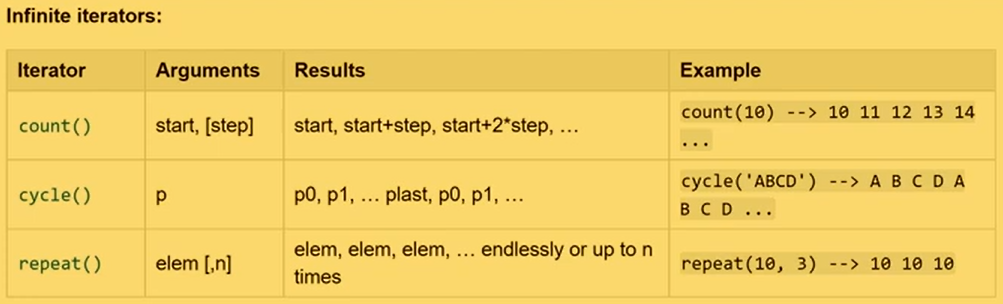
<br>

2. iterators terminating on shotest input sequence. Gives the ability to perform common pre processing on collection of things to loop over.
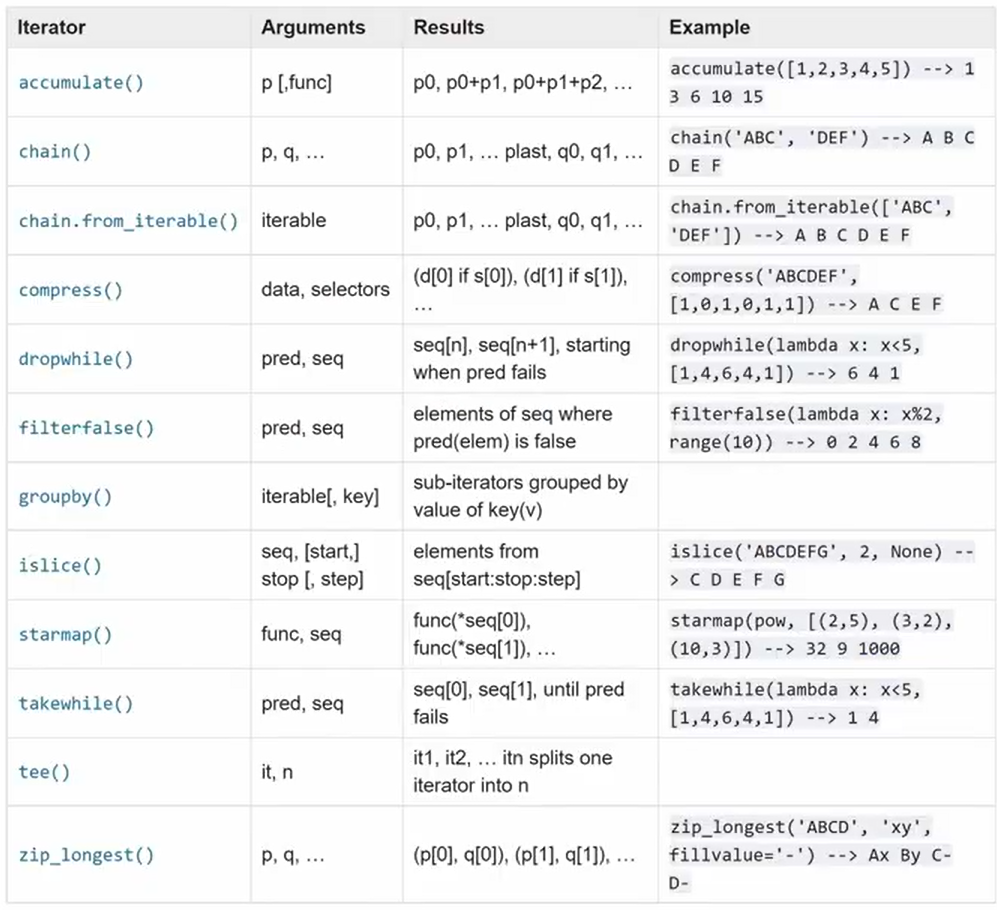
<br>

3. combinatorics iterators : product(), permutations(), combinations() & combinations_with_replacement() 
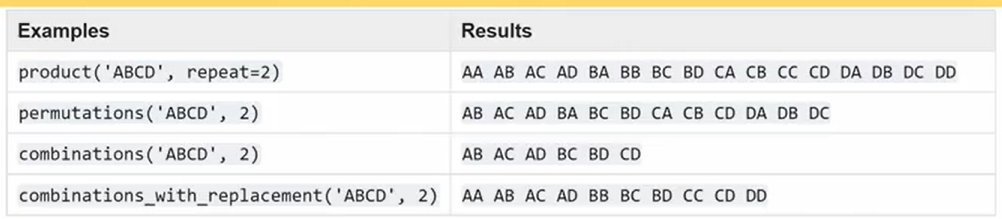

### we will now construct a list of all possible hands in `poker`

In [ ]:
import itertools

# playing cards are determined by thier rand & their suit.
# The possible ranks are 2 through 10, along with KQJA

ranks = list(range(2, 11)) + ['J', 'K', 'Q', 'A']
# this is a list of integers & strings so we make all strings
ranks = [str(rank) for rank in ranks]
# print(ranks)
suits = ['Hearts', 'Spade', 'Diamonds', "Clubs"]

deck = [card for card in itertools.product(ranks, suits)]
print(deck[:4])

# for (index, card) in enumerate(deck, start=1):
#     print(index, card)

# we can create a list of all possible 5 card poker hands by using the "combinatins" iterator
hands = [hand for hand in itertools.combinations(deck, 5)]
print(f"The number of 5-card poker hands is {len(hands)}.") # ~ 2.6 million possible hands :0


